## STAT 201A - Introduction to Probability at an advanced level Problem set

November 20th, 2023

Patrick Wang

### 1. Simulation of Markov Process.

(a) Write the Markov process in matrix representation, that is, define the matrix $P \in R^{3\times3}$ such that $P_{ij}$ is the probability of transitioning from the node $i$ to $j$.

$$P = \begin{bmatrix} 0.2 & 0.7 & 0.1\\ 0.2 & 0.5 & 0.3\\ 0.2 & 0.4 & 0.4\\ \end{bmatrix}$$

(b) Simulate one single realization of the chain, that is, starting from $X_0 = 1$, update the value of $X_i$ using the probabilities defined by the process.

In [6]:
import numpy as np

# Define matrix P
P1 = np.array([0.2, 0.7, 0.1])
P2 = np.array([0.2, 0.5, 0.3])
P3 = np.array([0.2, 0.4, 0.4])
P = np.array([P1, P2, P3])

# Simulate one realization
n = 1
X_0 = np.array([1, 0, 0])
P_n = np.linalg.matrix_power(P, 1)
X_n = X_0 @ P_n
X_n

array([0.2, 0.7, 0.1])

### 2. Stationary Distribution. The goal of this section is to show the convergence of the probability distribution of the Markov process.

(a) Calculate theoretically the stationary state of the process by finding the vector $\pi_{\infty} \in R^3$ such that $\pi_{\infty}^T = \pi_{\infty}^T P$. Notice that this is the same as finding the eigenvector with eigenvalue equals one of the matrix $P^T$. This is the same as solving $(P^T − I)\pi_{\infty} = 0$. You can solve the linear system of equation numerically or analytically.

Let the Stationary state be: $X' = (a, b, c)^T$

Then we have:

$$
P^T X^T = X^T \implies
\begin{bmatrix}
0.2 & 0.2 & 0.2 \\
0.7 & 0.5 & 0.4 \\
0.1 & 0.3 & 0.4 \\
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
$$

This leads to the system of equations:

\begin{align*}
2a+2b+2c &= 10a \\
7a+5b+4c &= 10b \\
a+3b+4c &= 10c \\
a+b+c &= 1
\end{align*}

Solving the system, we get:

\begin{align*}
8a-2b-2c &= 0 \\
7a-5b+4c &= 0 \\
a+3b-6c &= 0 \\
9c &= 5 - 2.4 = 2.6, \quad c = \frac{26}{90} \approx 0.29 \\
b &= 0.51
\end{align*}

Therefore, the Stationary distribution $\lambda$ is:

$$
\lambda = 
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=
\begin{bmatrix}
0.2 \\
0.51 \\
0.29 \\
\end{bmatrix}
$$

In [7]:
import numpy as np

# Define matrix P
P1 = np.array([0.2, 0.7, 0.1])
P2 = np.array([0.2, 0.5, 0.3])
P3 = np.array([0.2, 0.4, 0.4])
P = np.array([P1, P2, P3])

def markov_process(X_0, P, n):
    P_n = np.linalg.matrix_power(P, n)
    return (X_0 @ P_n)

X_100 = markov_process([1, 0, 0], P, 100)
X_110 = markov_process([1, 0, 0], P, 110)
print(f"Stationary distribution (n=100): {X_100}")
print(f"X_100 = X_110: {np.allclose(X_100, X_110)}")

Stationary distribution (n=100): [0.2        0.51111111 0.28888889]
X_100 = X_110: True


The analytical calculation result is consistent with the numerical result. We can also see it in the graph below.

(b) Starting now from an initial probability distribution $\pi_0$ on the nodes, compute the value of $\pi_i^T = \pi_0^TP^i$ the probability distribution at time $i$. Show that $\pi_i \rightarrow \pi_{\infty}$ and make plot of $i$ vs $\lVert \pi_i - \pi_{\infty} \rVert_{2}^{2}.$ Generate this plot for at least two different initial conditions $\pi_0$ and compare.

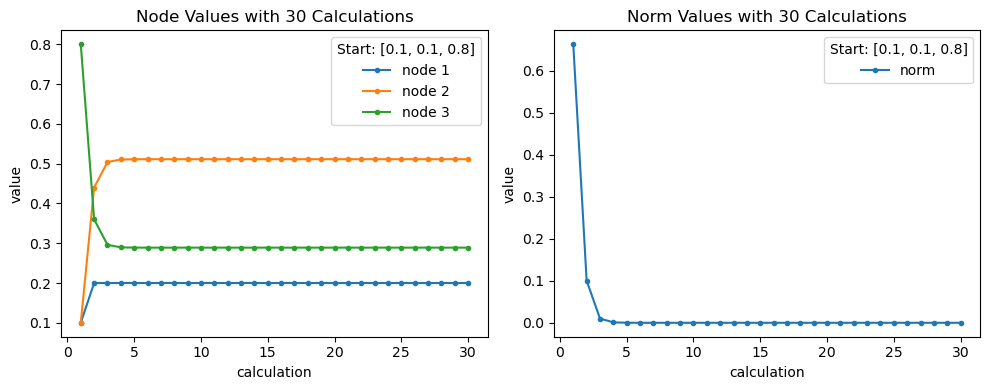

In [8]:
import matplotlib.pyplot as plt

# Calculate the value for each i
sim = 30
initial = [0.1, 0.1, 0.8]
node1, node2, node3, norm = [0]*sim, [0]*sim, [0]*sim, [0]*sim
for i in range(sim):
    X_i = markov_process(initial, P, i)
    node1[i] = X_i[0]
    node2[i] = X_i[1]
    node3[i] = X_i[2]
    norm[i] = ((X_i[0]-X_100[0])**2 + (X_i[1]-X_100[1])**2 + (X_i[2]-X_100[2])**2) ** (1/2)

# Plot
x_val = np.linspace(1, sim, sim)
plt.figure(figsize=(10, 4))

# Node values
plt.subplot(1, 2, 1)
plt.plot(x_val, node1, label='node 1', marker='.')
plt.plot(x_val, node2, label='node 2', marker='.')
plt.plot(x_val, node3, label='node 3', marker='.')
plt.title(f'Node Values with {sim} Calculations')
plt.legend(title=f"Start: {initial}")
plt.xlabel('calculation')
plt.ylabel('value')

# Norm
plt.subplot(1, 2, 2)
plt.plot(x_val, norm, label='norm', marker='.')
plt.title(f'Norm Values with {sim} Calculations')
plt.legend(title=f"Start: {initial}")
plt.xlabel('calculation')
plt.ylabel('value')

plt.tight_layout()
plt.show()

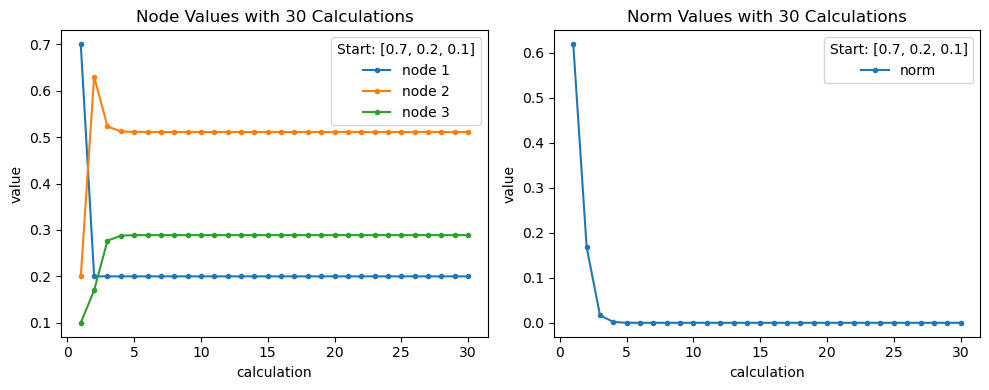

In [9]:
# Try a different starting point
import matplotlib.pyplot as plt

# Calculate the value for each i
sim = 30
initial = [0.7, 0.2, 0.1]
node1, node2, node3, norm = [0]*sim, [0]*sim, [0]*sim, [0]*sim
for i in range(sim):
    X_i = markov_process(initial, P, i)
    node1[i] = X_i[0]
    node2[i] = X_i[1]
    node3[i] = X_i[2]
    norm[i] = ((X_i[0]-X_100[0])**2 + (X_i[1]-X_100[1])**2 + (X_i[2]-X_100[2])**2) ** (1/2)

# Plot
x_val = np.linspace(1, sim, sim)
plt.figure(figsize=(10, 4))

# Node values
plt.subplot(1, 2, 1)
plt.plot(x_val, node1, label='node 1', marker='.')
plt.plot(x_val, node2, label='node 2', marker='.')
plt.plot(x_val, node3, label='node 3', marker='.')
plt.title(f'Node Values with {sim} Calculations')
plt.legend(title=f"Start: {initial}")
plt.xlabel('calculation')
plt.ylabel('value')

# Norm
plt.subplot(1, 2, 2)
plt.plot(x_val, norm, label='norm', marker='.')
plt.title(f'Norm Values with {sim} Calculations')
plt.legend(title=f"Start: {initial}")
plt.xlabel('calculation')
plt.ylabel('value')

plt.tight_layout()
plt.show()

### 3. Absorbing state. Consider now that node 3 is an absorbing state and we want to estimate the waiting time until the process arrives at $X_i = 3$ from any other node.

(a) Starting from each one of $X_0 = 1$ and $X_0 = 2$, run multiple simulation of the Markov chain (Problem 1, part b) until $X_i = 3$ and store the arrival time until this happens. Make a histogram of the arrival time for both $X_0 = 1$ and $X_0 = 2$ and compute the mean.

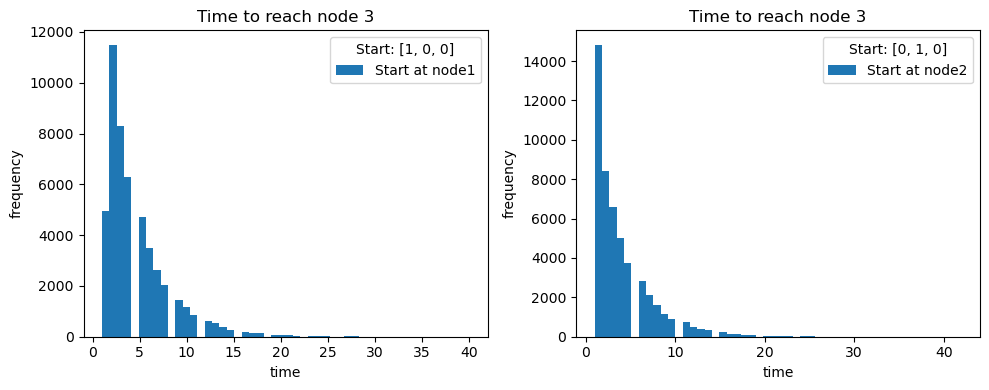

Mean time to reach 3 start at 1: 4.61384
Mean time to reach 3 start at 2: 3.86912


In [10]:
import numpy as np

# This function run one simulation
def markov_sim3(p1, p2, p3, initial):
    tmp = initial
    if initial[0] == 1:
        tmp = np.random.multinomial(1, p1, size=1)[0]
    elif initial[1] == 1:
        tmp = np.random.multinomial(1, p2, size=1)[0]
    else:
        tmp = np.random.multinomial(1, p3, size=1)[0]
    return tmp

# This function use markov_sim3 to run simulations and record time
def markov_times(p1, p2, p3, initial, sim, target):
    times = [0] * sim
    for s in range(sim):
        time = 0
        state = initial
        while state[target-1] == 0:
            state = markov_sim3(p1, p2, p3, state)
            time += 1
        times[s] = time
    return times

# Simulation
sim, goal, start1, start2 = 50000, 3, [1, 0, 0], [0, 1, 0]
P1 = np.array([0.2, 0.7, 0.1])
P2 = np.array([0.2, 0.5, 0.3])
P3 = np.array([0.2, 0.4, 0.4])
times_1 = markov_times(P1, P2, P3, start1, sim, goal)
times_2 = markov_times(P1, P2, P3, start2, sim, goal)

# Plot
plt.figure(figsize=(10, 4))

# Node values
plt.subplot(1, 2, 1)
plt.hist(times_1, label='Start at node1', bins=50)
plt.title(f'Time to reach node {goal}')
plt.legend(title=f"Start: {start1}")
plt.xlabel('time')
plt.ylabel('frequency')

# Norm
plt.subplot(1, 2, 2)
plt.hist(times_2, label='Start at node2', bins=50)
plt.title(f'Time to reach node {goal}')
plt.legend(title=f"Start: {start2}")
plt.xlabel('time')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()

# Compute the mean
print(f"Mean time to reach 3 start at 1: {np.mean(times_1)}")
print(f"Mean time to reach 3 start at 2: {np.mean(times_2)}")

(b) Compute theoretically the mean arrival time to the absorbing state and compare it with part a. To do so, notice that if $T_i$ denotes the random variable associated to the arrival time starting from $X_0 = i$, then $\mu_i=1+\sum_{j=1}^3 p_{ij} \mu_{j}$ with $\mu_i = E[T_i]$. This is a linear system of equations that you can solve. Notice $T_3 = 0$.


$$
\begin{aligned}
\mu_1 &= 1 + p_{11}\mu_1 + p_{12}\mu_2\\
&= 1 + 0.2\mu_1 + 0.7\mu_2\\
&\implies 8\mu_1 -7\mu_2 = 10\\
\end{aligned}
$$

$$
\begin{aligned}
\mu_2 &= 1 + p_{21}\mu_1 + p_{22}\mu_2\\
&= 1 + 0.2\mu_1 + 0.5\mu_2\\
&\implies -2\mu_1 +5\mu_2 = 10\\
\end{aligned}
$$

Solving the linear systems, we have $\mu_2 = \frac{50}{13} \approx 3.846$, $\mu_1 = \frac{60}{13} \approx 4.615$. The result is consistent with the simulation result.